In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.display import display, HTML

In [2]:
vgs_2016_df = pd.read_csv('VGS_2016_Backup copy.csv')
vgs_2019_df = pd.read_csv('vgsales-12-4-2019.csv')

vg = vgs_2019_df.merge(vgs_2016_df, on='Name')

#For showing tables along side eachother
def display_side_by_side(dfs:list, captions:list):
    """Display tables side by side to save vertical space
    Input:
        dfs: list of pandas.DataFrame
        captions: list of table captions
    """
    output = ""
    combined = dict(zip(captions, dfs))
    for caption, df in combined.items():
        output += df.style.set_table_attributes("style='display:inline'").set_caption(caption)._repr_html_()
        output += "\xa0\xa0\xa0"
    display(HTML(output))

<h4> Cleaning and reformating data

In [3]:
#After combining the two tables to fill in missing and updated data, renaming the columns that i need
vg = vg.rename(columns={'Platform_x': 'Platform',
                        'Genre_x': 'Genre',
                        'Publisher_x': 'Publisher',
                       'NA_Sales_x': 'NA_Sales',
                       'JP_Sales_x': 'JP_Sales',
                       'Other_Sales_x': 'Other_Sales',
                       'Global_Sales_x': 'Global_Sales',
                       'Critic_Score_x': 'Critic_Score',
                       'User_Score_x': 'User_Score',
                       'Developer_x': 'Developer'
                       })

In [4]:
#Dropped null values in column
vg.dropna(subset = ['Year_of_Release'],inplace=True)

In [5]:
#Reformating these columns to reflect score without decimal place by basing it on 100 points instead of 10 points
vg['User_Score_y'] = round(10*vg['User_Score_y'])
vg['User_Score'] = round(10*vg['User_Score'])
vg['Critic_Score'] = round(10*vg['Critic_Score'])

In [6]:
#Combining the two columns at rows where one might have a missing value but the other doesnt. They are both the same column
vg['Platform'] = np.where(vg['Platform'].isnull(), vg['Platform_y'],vg['Platform'])
vg['Publisher'] = np.where(vg['Publisher'].isnull(), vg['Publisher_y'],vg['Publisher'])
vg['Developer'] = np.where(vg['Developer'].isnull(), vg['Platform_y'],vg['Platform'])
vg['Critic_Score'] = np.where(vg['Critic_Score'].isnull(), vg['Critic_Score_y'],vg['Critic_Score'])
vg['User_Score'] = np.where(vg['User_Score'].isnull(), vg['User_Score_y'],vg['User_Score'])
vg['Critic_Score_y'] = np.where(vg['Critic_Score_y'].isnull(), vg['Critic_Score'],vg['Critic_Score_y'])
vg['User_Score_y'] = np.where(vg['User_Score_y'].isnull(), vg['User_Score'],vg['User_Score_y'])
vg['Global_Sales'] = np.where(vg['Global_Sales'].isnull(), vg['Global_Sales_y'],vg['Global_Sales'])
vg['NA_Sales'] = np.where(vg['NA_Sales'].isnull(), vg['NA_Sales_y'],vg['NA_Sales'])
vg['EU_Sales'] = np.where(vg['EU_Sales'].isnull(), vg['PAL_Sales'],vg['EU_Sales'])
vg['JP_Sales'] = np.where(vg['JP_Sales'].isnull(), vg['JP_Sales_y'],vg['JP_Sales'])
vg['Global_Sales'] = np.where(vg['Global_Sales'].isnull(), vg['Global_Sales_y'],vg['Global_Sales'])
vg['Other_Sales'] = np.where(vg['Other_Sales'].isnull(), vg['Other_Sales_y'],vg['Other_Sales'])
vg['Genre'] = np.where(vg['Genre'].isnull(), vg['Genre_y'],vg['Genre'])
vg['Year_of_Release'] = np.where(vg['Year_of_Release'].isnull(), vg['Year'],vg['Year_of_Release'])
vg['Rating'] = np.where(vg['Rating'].isnull(), vg['ESRB_Rating'],vg['Rating'])

In [7]:
#Dropping columns i don't need
vg = vg.drop(columns=['VGChartz_Score',
                      'Platform_y',
                      'Publisher_y',
                      'Developer_y',
                      'Critic_Score_y',
                      'User_Score_y',
                      'Total_Shipped',
                      'Global_Sales_y',
                      'NA_Sales_y',
                      'PAL_Sales',
                      'JP_Sales_y',
                      'Other_Sales_y',
                      'Last_Update',
                      'status',
                      'Rank',
                      'ESRB_Rating',
                      'Critic_Count',
                      'Developer',
                      'basename',
                      'User_Count',
                      'Genre_y',
                      'Year',
                      'Vgchartzscore'])

In [8]:
#Changing format of data to make analysis easier.
vg['Year_of_Release'] = pd.to_datetime(vg['Year_of_Release'], format='%Y')
vg['User_Score'] = vg['User_Score'].astype('int32').round()
vg['Critic_Score'] = vg['Critic_Score'].astype('int32').round()
vg['Global_Sales'] = vg['NA_Sales']+ vg['EU_Sales'] + vg['JP_Sales'] + vg['Other_Sales']

In [9]:
#Renaming values in the rating column to allow better aggregation
vg.loc[vg.Rating == 'RP','Rating'] = 'Everyone 10+ (E10+)'
vg.loc[vg.Rating == 'AO','Rating'] = 'Mature (M)'
vg.loc[vg.Rating == 'E','Rating'] = 'Everyone (E)'
vg.loc[vg.Rating == 'E10','Rating'] = 'Everyone 10+ (E10+)'
vg.loc[vg.Rating == 'E10+','Rating'] = 'Everyone 10+ (E10+)'
vg.loc[vg.Rating == 'T','Rating'] = 'Teen (T)'
vg.loc[vg.Rating == 'M','Rating'] = 'Mature (M)'
vg.loc[vg.Rating == 'K-A','Rating'] = 'Everyone (E)'

vg.loc[vg.Publisher == 'EA Sports','Publisher'] = 'Electronic Arts'
vg.loc[vg.Publisher == 'Konami Digital Entertainment','Publisher'] = 'Konami'
vg.loc[vg.Publisher == 'Warner Bros. Interactive Entertainment','Publisher'] = 'Warner Bros. Interactive'
vg.loc[vg.Publisher == '2K Sports','Publisher'] = '2K Games'

In [10]:
#Highest rated game:
max_critic_value = vg['Critic_Score'].max()
max_user_value = vg['User_Score'].max()
max_critic_game = vg.loc[vg['Critic_Score'] == vg['Critic_Score'].max(),'Name'].iloc[0]
max_user_game = vg.loc[vg['User_Score'] == vg['User_Score'].max(),'Name'].iloc[0]
low_user_value = vg['User_Score'].min()
low_user_game = vg.loc[vg['User_Score'] == vg['User_Score'].min(),'Name'].iloc[0]
low_critic_value = vg['Critic_Score'].min()
low_critic_game = vg.loc[vg['Critic_Score'] == vg['Critic_Score'].min(),'Name'].iloc[0]

Highest_sale_na = vg['NA_Sales'].max()
Highest_sale_eu = vg['EU_Sales'].max()
Highest_sale_jp = vg['JP_Sales'].max()
Highest_sale_gl = vg['Global_Sales'].max()
highest_sold_gameNA = vg.loc[vg['NA_Sales'] == vg['NA_Sales'].max(),'Name'].iloc[0]
highest_sold_gameEU = vg.loc[vg['EU_Sales'] == vg['EU_Sales'].max(),'Name'].iloc[0]
highest_sold_gameJP = vg.loc[vg['JP_Sales'] == vg['JP_Sales'].max(),'Name'].iloc[0]
highest_sold_gameGL = vg.loc[vg['Global_Sales'] == vg['Global_Sales'].max(),'Name'].iloc[0]

## Some questions we'll answer as we go
- Highest rated game
- most sales in the North American region
- Top 10 products by sale
- What age category of game (rating) sells the most or averages the highest rating
- which system sells the most games and has the highest rated games
- Which publisher sells the most and has the highest rating
- biggest sale for each publisher and system
- most profitable category and sub-category

**Sales values are in MILLIONS**

<h3>Q1: Highest and lowest rated game by users and critics

In [11]:
print('Highest rated user game is {} with a score of {}'.format(max_user_game,max_user_value)+'\n'+'Highest rated critic game is {} with a score of {}'.format(max_critic_game,max_critic_value))
print('Lowest rated user game is {} with a score of {}'.format(low_user_game,low_user_value)+'\n'+'Lowest rated critic game is {} with a score of {}'.format(low_critic_game,low_critic_value))

Highest rated user game is Final Fantasy X with a score of 100
Highest rated critic game is Grand Theft Auto IV with a score of 100
Lowest rated user game is Charlie and the Chocolate Factory with a score of 5
Lowest rated critic game is Kabuki Warriors with a score of 10


<h3>Q2: Highest sold game by region

In [12]:
print('Highest sold games are:'+'\n'+ 'North America : {} with a total of {} million sold units'.format(highest_sold_gameNA,Highest_sale_na)+'\n'+'Europe : {} with a total of {} million sold units'.format(highest_sold_gameEU,Highest_sale_eu)+'\n'+'Japan : {} with a total of {} million sold units'.format(highest_sold_gameJP,Highest_sale_jp)+'\n'+'Global sales : {} with a total of {} million sold units'.format(highest_sold_gameGL,round(Highest_sale_gl,2)))

Highest sold games are:
North America : Wii Sports with a total of 41.36 million sold units
Europe : Wii Sports with a total of 28.96 million sold units
Japan : New Super Mario Bros. with a total of 6.5 million sold units
Global sales : Wii Sports with a total of 82.54 million sold units


<h3>Q3: Top Ten Games Sold Globally & North American Region

In [13]:
top_games = vg.groupby('Global_Sales')
top_g = top_games['Name'].max().tail(10).sort_index(axis=0,ascending=False)
top_g = pd.DataFrame(top_g)
top_g

,Name
Global_Sales,
82.54,Wii Sports
35.52,Mario Kart Wii
32.77,Wii Sports Resort
29.80,New Super Mario Bros.
28.91,Wii Play
28.32,New Super Mario Bros. Wii
23.21,Mario Kart DS
22.70,Wii Fit
21.82,Kinect Adventures!


In [14]:
top_games_na = vg.groupby('NA_Sales')
top_g_na = top_games_na['Name'].max().tail(10).sort_index(axis=0,ascending=False)
top_g_na = pd.DataFrame(top_g_na)
top_g_na

,Name
NA_Sales,
41.36,Wii Sports
15.68,Mario Kart Wii
15.61,Wii Sports Resort
15.00,Kinect Adventures!
14.44,New Super Mario Bros. Wii
13.96,Wii Play
11.28,New Super Mario Bros.
9.76,Call of Duty: Black Ops
9.71,Mario Kart DS


<h3> Q4: What age category of game (rating) and genre sells the most.

Going a step further, we can check what rating and genre out of the 4 has made the most sales.

In [15]:
ratings = vg['Rating'].value_counts()
ratings = pd.DataFrame(ratings)
ratings

,Rating
Teen (T),6813
Everyone (E),6472
Mature (M),4300
Everyone 10+ (E10+),3679


Based on our analysis, we can say there are more games made for the younger crowd than any other category (Everyone (E) and Everyone 10+ (E10+) can generally be interchangable). The Teen category has the outright largest amount of games on the list

In [16]:
ratings_gp = vg.groupby('Rating')
r_na = ratings_gp['NA_Sales'].aggregate([sum,np.mean,max])
r_eu = ratings_gp['EU_Sales'].aggregate([sum,np.mean,max])
r_jp = ratings_gp['JP_Sales'].aggregate([sum,np.mean,max])
display_side_by_side([r_na.round(2),r_eu.round(2),r_jp.round(2)],['North American Sales','European Sales','Japanese Sales'])

,sum,mean,max
Rating,,,
Everyone (E),2718.710000,0.420000,41.360000
Everyone 10+ (E10+),1206.910000,0.330000,5.950000
Mature (M),2647.210000,0.620000,9.760000
Teen (T),2198.220000,0.320000,9.760000
,sum,mean,max
Rating,,,
Everyone (E),1651.830000,0.260000,28.960000
Everyone 10+ (E10+),632.320000,0.170000,3.110000
Mature (M),1706.790000,0.400000,9.090000


As expected, games geared towards the younger crowd (E & E10+) have sold more globally. Using the mean, however, to get a more accurate performance based on individual games, we can see that games rated Matured actually average a higher number of sales across the different global markets when compared to the other ratings.

In [17]:
genre = vg.groupby('Genre')
g = genre['NA_Sales'].aggregate(['sum',np.mean,max])
g

,sum,mean,max
Genre,,,
Action,1693.50,0.397815,9.66
Action-Adventure,204.09,0.391727,3.13
Adventure,405.30,0.282439,3.74
Education,0.08,0.080000,0.08
Fighting,368.42,0.397862,6.62
MMO,9.49,0.365000,2.57
Misc,734.00,0.512212,13.96
Music,68.40,0.514286,4.05
Party,20.87,1.159444,15.00


We see that Action games sell the most in the North American market, followed by sports games and then shooters (which can still be categorized as action games). This performance mirrors the global performance of genres as well.

Party games average a higher margin of units sold but that probably would be skewed by the fact there is a much smaller pool to choose from. Amongst the three big sellers, Shooters on average sell more than the other genres, followed by sports and then action games.

In [18]:
critic_score_m = round(ratings_gp['Critic_Score'].mean().to_frame())
user_score_m = round(ratings_gp['User_Score'].mean().to_frame())

display_side_by_side([critic_score_m,user_score_m],['Critic score','User score'])

,Critic_Score
Rating,
Everyone (E),72.000000
Everyone 10+ (E10+),69.000000
Mature (M),74.000000
Teen (T),70.000000
,User_Score
Rating,
Everyone (E),70.000000
Everyone 10+ (E10+),68.000000
Mature (M),72.000000


Teen games get rated higher on average followed by Matured games for user scores, while critics rate matured games higher folloed by games for Everyone.

<h3> Q4: Which system sells the most globally and in the North American Market

In [19]:
#Sales summary that have occured on system with atleast 100 million total sold games.
platform = vg.groupby('Platform')
platform_global = platform['Global_Sales'].sum()
plat = pd.Series(platform_global)
plat = pd.DataFrame(plat[plat > 100])
plat.sort_values(by = 'Global_Sales',ascending=False)

,Global_Sales
Platform,
X360,2508.28
PS2,2169.13
PS3,2152.36
PC,1726.56
Wii,1257.66
DS,772.62
PS4,728.97
XB,671.30
PSN,666.51


Xbox 360 generated the most sales globally, followed by the Playstation 2 and Playstation 3 systems

In [22]:
#region_sales = vg[['Platform','NA_Sales','EU_Sales','JP_Sales']].copy()
region_NA = platform['NA_Sales'].sum()
region_EU = platform['EU_Sales'].sum()
region_JP = platform['JP_Sales'].sum()
region_NA = pd.DataFrame(region_NA[region_NA > 50])
region_NA.sort_values(by = 'NA_Sales',ascending=False)

,NA_Sales
Platform,
X360,1577.84
PS2,1215.44
PS3,1022.76
PC,757.74
Wii,702.14
XB,413.11
DS,370.64
PSN,339.05
PS4,318.15


Focusing on the North American market, we can see the same pattern as before.
Xbox360 leading in sales, followed closely by the PS2 and PS3

In [23]:
#Based on the 3 systems that we have sold the most globslly
plat_count = platform['Rating'].value_counts()
# pa = pd.Series(pla_count)
ps3_count = plat_count.loc[('PS3')].to_frame()
x360_count = plat_count.loc[('X360')].to_frame()
ps2_count = plat_count.loc[('PS2')].to_frame()

display_side_by_side([ps2_count,ps3_count,x360_count],['PS2','PS3','Xbox 360'])

,Rating
Rating,
Teen (T),964
Everyone (E),951
Mature (M),363
Everyone 10+ (E10+),293
,Rating
Rating,
Teen (T),701
Mature (M),663
Everyone (E),482


<h3>Q5: Which publisher sells the most and what are their highest rated game

In [24]:
#Publishers that sold atleast 100 million units of games from the dataset
publisher = vg.groupby('Publisher')
publish_g = publisher['Global_Sales'].sum()
publish_g = pd.DataFrame(publish_g[publish_g > 100])
publish_g.sort_values(by = 'Global_Sales',ascending=False)

,Global_Sales
Publisher,
Electronic Arts,3729.01
Activision,2145.05
Ubisoft,1238.20
Nintendo,910.46
Rockstar Games,889.71
THQ,659.13
Warner Bros. Interactive,558.00
Sony Computer Entertainment,556.75
2K Games,506.33


From the table, we can see that Electronic Arts, Activision and Ubisoft are the top 3 publishers.

In [25]:
list_place = list(publish_g.index.values)
publish_r = pd.DataFrame(round(publisher['User_Score'].mean()))
publish_r_edit = publish_r.loc[publish_r.index.isin(list_place)]
publish_r_edit.sort_values(by = 'User_Score',ascending=False)

,User_Score
Publisher,
Rockstar Games,80.0
Nintendo,79.0
Microsoft Game Studios,78.0
Sony Computer Entertainment,77.0
Namco,77.0
Midway Games,75.0
Capcom,75.0
Eidos Interactive,75.0
Square Enix,74.0


Rockstar Games releases average the highest user score from the list, followed by Nintendo and Microsoft Game Studios. With Codemasters, Disney Interactive Studios being the games that average the lowest score 

<h3>Q6: Average user ratings on each system and their individual highest sold game in North America.

In [28]:
plat_mean = platform['User_Score'].mean().to_frame().round()
platform_list = list(plat.index.values)
plat_mean = plat_mean.loc[plat_mean.index.isin(platform_list)]
plat_mean.sort_values(by = 'User_Score',ascending=False)

,User_Score
Platform,
PS,76.0
GC,75.0
XB,75.0
GBA,74.0
OSX,74.0
PS2,74.0
PSN,73.0
PSV,73.0
XBL,73.0


The systems with the highest ratings are the older systems, however from the big 3 we've been focused on, PS2 games average higher ratings followed by PS3 and then Xbox 360.

In [29]:
#Highest rated game on each system
platform_rating = platform['User_Score'].idxmax(axis='columns')
vg[['Name','Platform','Publisher','User_Score','NA_Sales']].loc[platform_rating].reset_index(drop=True)

,Name,Platform,Publisher,User_Score,NA_Sales
0,Spider-Man,2600,Parker Bros.,90,0.87
1,Doom,3DO,Art Data Interactive,85,0.10
2,Fire Emblem: Awakening,3DS,Nintendo,91,0.90
3,Defender,5200,Atari,78,0.20
4,Impossible Mission,7800,Atari,48,0.11
5,Doom,AJ,Atari,85,0.10
6,The Lost Vikings,Amig,Interplay Productions,91,0.04
7,Final Fantasy VII,And,Square Enix,92,3.01
8,SoulCalibur II,Arc,Namco,91,0.99
9,Impossible Mission,C64,Epyx,48,0.11


In [30]:
#Name of the best sold games on each system in North America
platform_best = platform['NA_Sales'].idxmax(axis='columns')
vg[['Name','Platform','Publisher','User_Score','Global_Sales','NA_Sales']].loc[platform_best].reset_index(drop=True)

,Name,Platform,Publisher,User_Score,Global_Sales,NA_Sales
0,Spy Hunter,2600,Sega,78,1.67,1.13
1,Alone in the Dark,3DO,Interplay,57,0.49,0.14
2,Mario Kart 7,3DS,Nintendo,82,12.65,5.03
3,Defender,5200,Atari,78,0.40,0.20
4,Impossible Mission,7800,Atari,48,0.12,0.11
5,Wolfenstein 3D,AJ,Atari,60,0.16,0.12
6,The Lost Vikings,Amig,Interplay Productions,91,0.05,0.04
7,Grand Theft Auto: San Andreas,And,Rockstar Games,90,20.81,9.43
8,Mortal Kombat,Arc,Midway Games,84,2.85,1.98
9,Impossible Mission,C64,Epyx,48,0.12,0.11


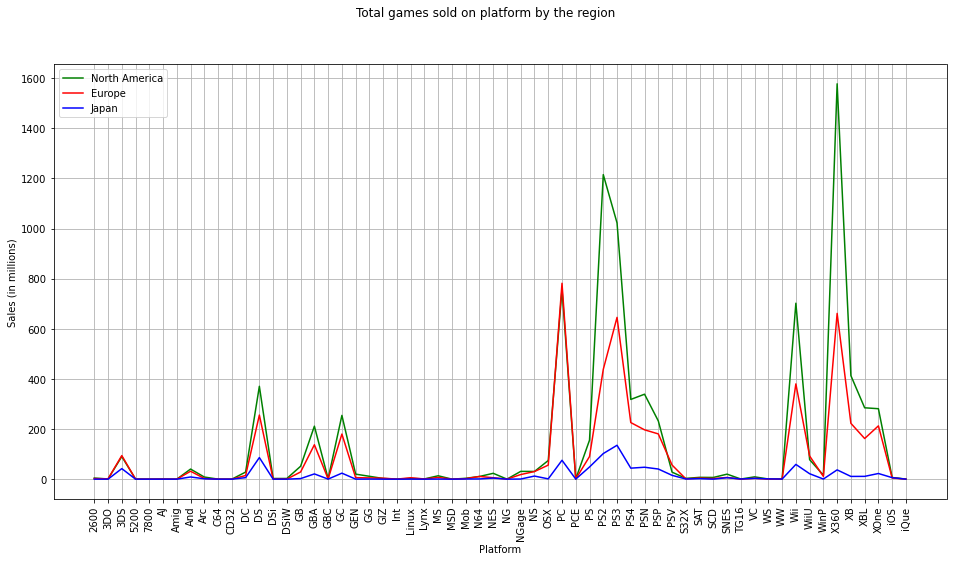

In [31]:
region = vg.groupby('Platform')
region_na = region.agg({'NA_Sales': ['sum']}).round(2)
region_eu = region.agg({'EU_Sales': ['sum']}).round(2)
region_jp = region.agg({'JP_Sales': ['sum']}).round(2)

plt.figure(num=None, figsize=(16, 8), edgecolor='k')
plt.plot(region_na, 'g',label='North America')
plt.plot(region_eu, 'r',label='Europe')
plt.plot(region_jp, 'b',label='Japan')
plt.suptitle('Total games sold on platform by the region')
plt.xlabel('Platform')
plt.ylabel('Sales (in millions)')
plt.xticks(rotation=90)
plt.legend(loc='best')
plt.grid(True)

plt.show()

We can see the North American market is largest for most systems with largest margins being in the PS2 and X360, the two most popular consoles at the time. PS3 being a close 3rd.

We can also observe that 

<h4>Q7: What is the most profitable option for a business to create a game:
    
         - Choosing a publisher with a good track record
         - Best genre and rating of game to choose
         - Best systems to focus on

<h4> Choosing a publisher

In [33]:
#List of pubishers who have sold atleast 400K units of a gaming software, their avg sale and how many games are on the list

avg_g = pd.DataFrame(publisher['NA_Sales'].mean().round(3))
count_g = pd.DataFrame(vg['Publisher'].value_counts().reset_index()) 
count_g = count_g.rename(columns = {'index':'Publisher','Publisher':'Count'})
avg = avg_g[avg_g['NA_Sales'] >= 0.4]
publisher_best = pd.merge(avg,count_g, on='Publisher')
publisher_best = publisher_best.rename(columns={'NA_Sales': 'Avg_NA_Sales'})
publisher_best.sort_values(by = 'Avg_NA_Sales',ascending=False).reset_index(drop=True)

,Publisher,Avg_NA_Sales,Count
0,Ultra Games,2.716,5
1,RedOctane,2.588,27
2,SCEA,2.080,1
3,Rockstar Games,1.801,246
4,Flying Edge,1.700,1
5,Coconuts Japan,1.470,1
6,Valve Corporation,1.421,13
7,Square EA,1.354,8
8,Arena Entertainment,1.286,17
9,Nintendo,1.283,314


Here we can see the publisers with the highest average number of games sold in North America and how many different games that are on the list (Average sold game is atleat 400K units). This can be used to determine if the business would like to go with a company with an excellent track record like ROCKSTAR, NINTENDO,MICROSOFT GAME STUDIOS ETC or companies that have very good niches having sold a few games but rank high on the list (ULTRA GAMES, REDOCTANE, ARENA ENTERTAINMENT ETC) 

<h4>Best genre and rating of game to choose from

Based on our prior analysis, we identified the Matured (M) category as the rating that averages the most number of sales both globally and in North America. The company can go with this if they they would like to maximize their sales margin. It should be noted that Matured games also average higher user ratings, therefore there might be a higher quality threshold for the company to meet to be able to maximize their return.

If however they wish to utilize an economy of scale outlook, the younger category would be the best option (E & E10+) as they have the largest selection of games in the market (combined 10151 games) and have a lower quality threshold than the Matured rating.

<h4>Best system utilize

The Xbox 360, PS2 and PS3 had sold the most number of games. Comparing games within the same generation, the Xbox 360 would be the system of choice if a studio wished to release a game and wanted to maximize their opportunities using this dataset.